# S13 T02: Base de dades MySQL

In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exercici 1. Crea una base de dades relacionals senzilla utilitzant MySQL(https://www.mysql.com/) i connecta-la a Python

Realitzem la connexió amb MySQL local, i accedim a la BBDD creada "viatges05". Veiem el model relacional a continuació.

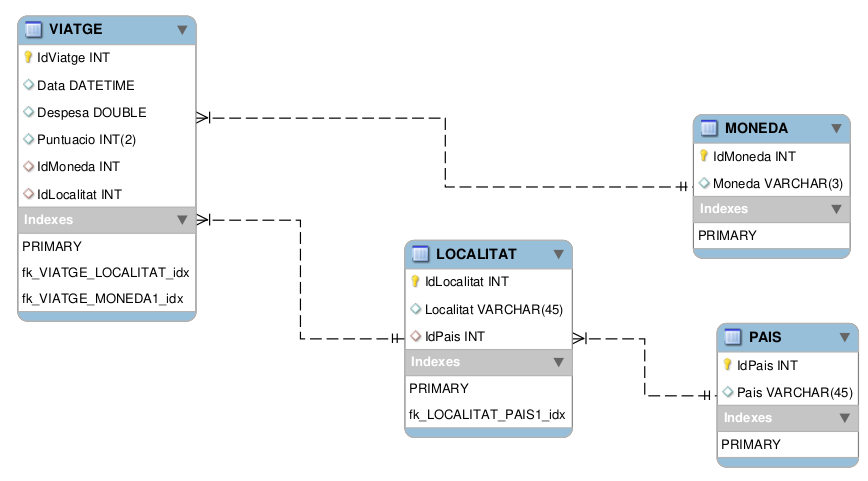

In [2]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="root",
    database="viatges05"
)

print(mydb) 

## Exercici 2. Mostra que pots carregar algunes consultes senzilles a un Pandas Dataframe.

Accedim i mostrem totes les taules de la BBDD, i la consulta "new_view02", que conté totes les dades intel·ligibles a l'ull humà, i amb la qual farem un gràfic. Les dades s'han carregat a MySQL Workbench directament.

In [3]:
mycursor = mydb.cursor()

In [4]:
query = ("SELECT Pais FROM PAIS "
         "WHERE IdPais = 1")

In [5]:
mycursor.execute(query)

In [6]:
myresult = mycursor.fetchall()

In [7]:
for x in myresult:
  print(x) 

('Espanya',)


In [8]:
dfPais=pd.read_sql("select * from PAIS", mydb)
dfLocalitat=pd.read_sql("select * from LOCALITAT", mydb)
dfMoneda=pd.read_sql("select * from MONEDA", mydb)
dfViatge=pd.read_sql("select * from VIATGE", mydb)

In [9]:
print(dfPais.info())
print(dfPais)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   IdPais  6 non-null      int64 
 1   Pais    6 non-null      object
dtypes: int64(1), object(1)
memory usage: 224.0+ bytes
None
   IdPais      Pais
0       1   Espanya
1       2    França
2       3  Alemanya
3       4  Portugal
4       5   Andorra
5       6    Itàlia


In [10]:
print(dfLocalitat.info())
print(dfLocalitat)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   IdLocalitat  7 non-null      int64 
 1   Localitat    7 non-null      object
 2   IdPais       7 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 296.0+ bytes
None
   IdLocalitat       Localitat  IdPais
0            1  Pas de la Casa       5
1            2        Sabadell       1
2            3          Oporto       4
3            4        Freiburg       3
4            5            Roma       6
5            6            Lyon       2
6            7         Getaria       1


In [11]:
print(dfMoneda.info())
print(dfMoneda)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   IdMoneda  2 non-null      int64 
 1   Moneda    2 non-null      object
dtypes: int64(1), object(1)
memory usage: 160.0+ bytes
None
   IdMoneda Moneda
0         1    EUR
1         2    RMB


In [12]:
print(dfViatge.info())
print(dfViatge)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   IdViatge     9 non-null      int64 
 1   Data         9 non-null      object
 2   Despesa      9 non-null      int64 
 3   Puntuacio    9 non-null      int64 
 4   IdMoneda     9 non-null      int64 
 5   IdLocalitat  9 non-null      int64 
dtypes: int64(5), object(1)
memory usage: 560.0+ bytes
None
   IdViatge       Data  Despesa  Puntuacio  IdMoneda  IdLocalitat
0         1   2/5/1995     1525          5         1            1
1         2   3/5/2009    25487          8         1            4
2         3  25/2/2005     6522          9         1            4
3         4   8/9/2021      525          6         1            3
4         5  15/6/2018    15888         10         1            6
5         6  26/6/2016     1523          3         1            6
6         7  19/2/1991     1586          7        

In [13]:
dfview=pd.read_sql("select * from new_view02", mydb)

In [14]:
print(dfview.info())
print(dfview)
print(dfview.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IdViatge   9 non-null      int64 
 1   Data       9 non-null      object
 2   Localitat  9 non-null      object
 3   Pais       9 non-null      object
 4   Despesa    9 non-null      int64 
 5   Moneda     9 non-null      object
 6   Puntuacio  9 non-null      int64 
dtypes: int64(3), object(4)
memory usage: 632.0+ bytes
None
   IdViatge       Data       Localitat      Pais  Despesa Moneda  Puntuacio
0         7  19/2/1991            Roma    Itàlia     1586    EUR          7
1         1   2/5/1995  Pas de la Casa   Andorra     1525    EUR          5
2         4   8/9/2021          Oporto  Portugal      525    EUR          6
3         3  25/2/2005        Freiburg  Alemanya     6522    EUR          9
4         2   3/5/2009        Freiburg  Alemanya    25487    EUR          8
5         6  26/6/2016           

## Exercici 3. Genera algun gràfic que resumeixi les dades. 

Farem dos gràfics, la despesa per localitat i la puntuació per viatge.

In [15]:
df01 = dfview.groupby(["Localitat"]).agg({"Despesa": "sum"}).reset_index()
df01.info()
df01.sort_values(by=["Despesa"], ascending=False, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Localitat  6 non-null      object
 1   Despesa    6 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 224.0+ bytes


In [16]:
dfview["IdVLoc"]=dfview["IdViatge"].map(str) + " - " + dfview["Localitat"]
print(dfview)

   IdViatge       Data       Localitat      Pais  Despesa Moneda  Puntuacio  \
0         7  19/2/1991            Roma    Itàlia     1586    EUR          7   
1         1   2/5/1995  Pas de la Casa   Andorra     1525    EUR          5   
2         4   8/9/2021          Oporto  Portugal      525    EUR          6   
3         3  25/2/2005        Freiburg  Alemanya     6522    EUR          9   
4         2   3/5/2009        Freiburg  Alemanya    25487    EUR          8   
5         6  26/6/2016            Lyon    França     1523    EUR          3   
6         5  15/6/2018            Lyon    França    15888    EUR         10   
7         9  25/5/2022        Sabadell   Espanya    30500    EUR          9   
8         8  10/9/2008        Sabadell   Espanya    25000    EUR          8   

               IdVLoc  
0            7 - Roma  
1  1 - Pas de la Casa  
2          4 - Oporto  
3        3 - Freiburg  
4        2 - Freiburg  
5            6 - Lyon  
6            5 - Lyon  
7        9 - Saba

In [17]:
df02 = dfview.loc[:,["IdViatge","Localitat","Puntuacio","IdVLoc"]]
df02.info()
df02.sort_values(by=["Puntuacio"], ascending=False, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IdViatge   9 non-null      int64 
 1   Localitat  9 non-null      object
 2   Puntuacio  9 non-null      int64 
 3   IdVLoc     9 non-null      object
dtypes: int64(2), object(2)
memory usage: 416.0+ bytes


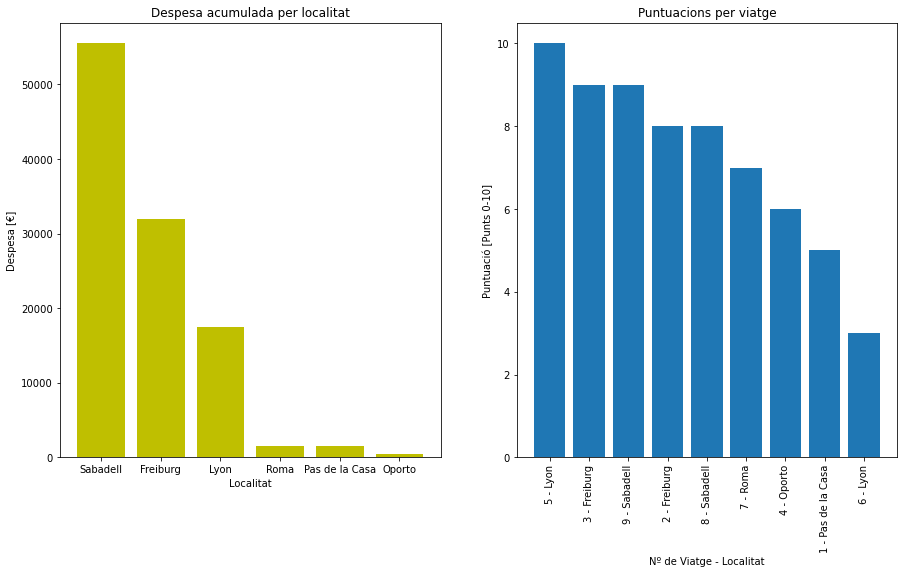

In [19]:
plt.figure(figsize=(15,8))

ax=plt.subplot(1, 2, 1)
x1=df01.Localitat
y1=df01.Despesa
plt.bar(x1,y1,color="y")
plt.title("Despesa acumulada per localitat",fontsize=12)
plt.xlabel("Localitat")
plt.ylabel("Despesa [€]")

ax=plt.subplot(1, 2, 2)
x2=df02.IdVLoc
y2=df02.Puntuacio
plt.bar(x2,y2)
plt.title("Puntuacions per viatge",fontsize=12)
plt.xlabel("Nº de Viatge - Localitat")
plt.xticks(rotation=90)
plt.ylabel("Puntuació [Punts 0-10]")


plt.show()